In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from simple_colors import*

# Read and Understand Data.

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Kaggle\Cars\used_cars_data.csv")
df1 = df.copy()
df1.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0 kmpl,1086 CC,null bhp,5.0,NaN,0.65
1768,1768,Hyundai EON 1.0 Kappa Magna Plus Optional,Kolkata,2014,9759,Petrol,Manual,First,20.3 kmpl,998 CC,68.05 bhp,5.0,NaN,2.75
3842,3842,Maruti Ertiga ZDI Plus,Hyderabad,2016,42000,Diesel,Manual,First,25.47 kmpl,1248 CC,88.50 bhp,7.0,13.33 Lakh,9.90
5507,5507,Maruti Dzire LDI,Pune,2017,48000,Diesel,Manual,First,28.4 kmpl,1248 CC,73.75 bhp,5.0,7.91 Lakh,6.00
1431,1431,Hyundai Verna 1.6 SX CRDI (O) AT,Kochi,2016,44875,Diesel,Automatic,Second,22.32 kmpl,1582 CC,126.32 bhp,5.0,NaN,8.01
2795,2795,BMW X5 X5 M,Pune,2015,69002,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,50.00
5721,5721,Hyundai Verna 1.6 SX CRDi (O),Pune,2012,89000,Diesel,Manual,First,22.32 kmpl,1582 CC,126.32 bhp,5.0,NaN,6.00
112,112,Tata Nano Twist XT,Bangalore,2014,25500,Petrol,Manual,First,25.4 kmpl,624 CC,37.5 bhp,4.0,NaN,2.15
6529,6529,Honda Jazz VX CVT,Pune,2019,1015,Petrol,Automatic,First,19.0 kmpl,1199 CC,88.7 bhp,5.0,10.55 Lakh,NaN
1621,1621,Skoda Fabia 1.2 TDI Ambition,Kolkata,2012,98000,Diesel,Manual,First,20.86 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.51


In [3]:
df1.drop('S.No.', axis=1, inplace=True)

In [4]:
# Getting no. of rows and columns in dataset.

print(red(f'This data has {df1.shape[0]} rows and {df1.shape[1]} columns', 'bold'))

This data has 7253 rows and 13 columns


In [5]:
print(magenta('#'*50, 'bold'), '\n', black('Features :-', 'bold'), '\n\n', df1.columns.to_list())
print('\n', magenta('#'*50, 'bold'), '\n', black('Missing Values :-', 'bold'), '\n\n', df1.isnull().sum().sort_values(ascending=False))
print('\n', magenta('#'*50, 'bold'), '\n', black('% Missing Values :-', 'bold'), '\n\n', np.round(100.0*df1.isnull().sum()/df1.shape[0], 2))
print('\n', magenta('#'*50, 'bold'), '\n', black('Duplicate Values :-', 'bold'), '\n\n', df1.duplicated().sum())
print('\n', magenta('#'*50, 'bold'), '\n', black('Unique Values :-', 'bold'), '\n\n', df1.nunique().sort_values(ascending=False))

################################################## 
 Features :- 

 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

 ################################################## 
 Missing Values :- 

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

 ################################################## 
 % Missing Values :- 

 Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Sea

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [7]:
# Observations ----------------------------------------------

# New_Price has only 1006 values. 86 % values are missing

# Price, which is a Target variable 17 % missing values.This needs to be analysed further.

# Seats has only 53 values missing and number of seats can be one of key factor in deciding price.

# Power and Engine has 46 missing values.

# Mileage only has two values missing.

# Mileage, Power, Engine, New_Price we know are quantitative variables but are of object dtype here and 
# needs to to converted to numeric.

In [8]:
# Getting Unique Values for categorical dtypes --------------------------------

cat_cols = ['Location','Fuel_Type', 'Transmission', 'Seats', 'Year', 'Owner_Type']

for item in cat_cols:
    print(black(f'Unique Values in {item} are :-', 'bold'))
    print('\n', df1[item].value_counts(ascending=False))
    print('\n', magenta('*'*50, 'bold'))

Unique Values in Location are :-

 Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

 **************************************************
Unique Values in Fuel_Type are :-

 Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

 **************************************************
Unique Values in Transmission are :-

 Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

 **************************************************
Unique Values in Seats are :-

 5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

 **************************************************
Unique Values in Year are :-

 2015    929
2014    925
2016    886
2013    791
2017    709
2

In [9]:
# Observations ----------------------------------------------

# Maximum car being sold have fuel type as Diesel.

# Mumbai has highest numbers of car availabe for purchase.

# 5204 cars with Manual transmission are available for purchase.

# Most of the cars are 5 seaters and First owned.

# Years of car ranges form 1996- 2015.

# Data Preprocessing.

In [10]:
# Datatype for Engine ,Power and Mileage are object because of unit assigned ,so striping units.

df1[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
242,2494 CC,100.6 bhp,12.99 kmpl
1714,1399 CC,68 bhp,20.0 kmpl
1285,1199 CC,79.4 bhp,18.6 kmpl
1000,998 CC,66.1 bhp,19.0 kmpl
2282,999 CC,123.24 bhp,18.88 kmpl
5812,1197 CC,82 bhp,18.9 kmpl
6806,1197 CC,82 bhp,18.9 kmpl
1650,1497 CC,118 bhp,17.0 kmpl
228,1998 CC,189.08 bhp,16.82 kmpl
5592,2982 CC,168.5 bhp,12.55 kmpl


In [11]:
Fuel = ['CNG', 'LPG']
df1[df1.Fuel_Type.isin(Fuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.0,NaN,2.10
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.0,NaN,1.90
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.45
1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,2.00


In [12]:
# Power has some values as "nullbhp". Mileage also has some observations as 0. 
# For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. 
# Dropping units from mileages, Engine and Power.

In [13]:
df1[df1.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [14]:
# remove units from Mileage

df1['Mileage'] = df1['Mileage'].str.rstrip('km/kg')
df1['Mileage'] = df1['Mileage'].str.rstrip('kmpl')

In [15]:
# remove units from Engine

df1['Engine'] = df1['Engine'].str.rstrip('CC')

In [16]:
# remove bhp units and replace null with nan for power

df1['Power'] = df1['Power'].str.rstrip('bhp')
df1['Power'] = df1['Power'].replace(regex='null', value=np.nan)

In [17]:
df1[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
1711,1495,94,13.2
2325,NaN,NaN,16.1
3240,1197,85.8,18.6
925,1896,105,15.5
1756,1248,74,28.4
3326,1248,88.5,28.09
824,799,53.3,25.17
1264,2982,168.5,12.55
6650,2477,175.56,13.5
2459,1498,98.96,23.0


In [18]:
# Checking values in Power and Mileage for 0.0 & verifying data for Engine, Power, Mileage. 
# Will check once again after converting datatype

df1[df1.Power==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [19]:
df1[df1.Mileage==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [20]:
df1[df1.Engine==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [21]:
df1[['Engine','Power','Mileage']].nunique()

Engine     150
Power      385
Mileage    438
dtype: int64

In [22]:
df1[['Engine','Power','Mileage']].isnull().sum()

Engine      46
Power      175
Mileage      2
dtype: int64

In [23]:
# Processing Seats

df1[df1.Seats==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197,NaN,0.0,NaN,18.0


In [24]:
# seats cannot be 0 so changing it to nan and will be handled in missing value

df1.loc[3999,'Seats'] =np.nan

In [25]:
# Processing New Price ---------------------------------------------------

# We know that New_Price is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
# This column clearly has a lot of missing values. We will impute the missing values later. 
# For now we will only extract the numeric values from this column.

In [26]:
# Create a new column after splitting the New_Price values.

import re

new_price_num = []

# Regex for numeric + ".numeric" + "Lakh"  format

sub_str = '^\d+(\.\d+)? Lakh$'

for item in df['New_Price']:
    if isinstance(item, str):
        if re.match(sub_str, item):
            new_price_num.append(float(item.split()[0]))
            
        else:
            print('Further needs preprocessing :-', item)
            # To detect if there are any observations in the column that do not follow [numeric + ".numeric " + "Lakh"]  format
            # that we see in the sample output
    else:
        new_price_num.append(np.nan)
        # If there are any missing values in the New_Price column, we add missing values to the new column   

Further needs preprocessing :- 1.28 Cr
Further needs preprocessing :- 1.04 Cr
Further needs preprocessing :- 1 Cr
Further needs preprocessing :- 1.04 Cr
Further needs preprocessing :- 1.39 Cr
Further needs preprocessing :- 1.02 Cr
Further needs preprocessing :- 1.4 Cr
Further needs preprocessing :- 1.06 Cr
Further needs preprocessing :- 1.27 Cr
Further needs preprocessing :- 1.13 Cr
Further needs preprocessing :- 1.36 Cr
Further needs preprocessing :- 1.66 Cr
Further needs preprocessing :- 1.6 Cr
Further needs preprocessing :- 1.28 Cr
Further needs preprocessing :- 2.3 Cr
Further needs preprocessing :- 1.71 Cr
Further needs preprocessing :- 1.39 Cr
Further needs preprocessing :- 1.58 Cr
Further needs preprocessing :- 3.75 Cr
Further needs preprocessing :- 1.06 Cr


In [27]:
new_price_num = []

# Regex for numeric + ".numeric" + "Lakh"  format

sub_str = '^\d+(\.\d+)? Lakh$'

for item in df['New_Price']:
    if isinstance(item, str):
        if re.match(sub_str, item):
            new_price_num.append(float(item.split()[0]))
            
        else:
            new_price_num.append(float(item.split()[0])*100)
            # Converting values in Crore to lakhs
    else:
        new_price_num.append(np.nan)
        # If there are any missing values in the New_Price column, we add missing values to the new column.
        
df1['new_price_num'] = new_price_num  # Add the new column to the data

df1.head(10)  # Checking the new dataframe

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,NaN
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814,55.2,5.0,NaN,2.35,NaN
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,3.50,NaN
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.0,21 Lakh,17.50,21.00
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,5.20,NaN
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3,1248,74,5.0,NaN,1.95,NaN


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  new_price_num      1006 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 793.4+ KB


In [29]:
df1.drop('New_Price', axis=1, inplace=True)

In [30]:
df1.select_dtypes(['object']).columns.to_list()

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

In [31]:
lst1 = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for item in lst1:
    df1[item] = df1[item].astype('category')

In [32]:
lst2 = ['Mileage','Engine','Power']

for item in lst2:
    df1[item] = df1[item].astype('float64')

In [33]:
df1.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7199.000000,6019.000000,1006.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280456,9.479468,22.779692
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809327,11.187917,27.759344
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000,3.910000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000,7.885000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,5.640000,11.570000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000,26.042500
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,375.000000


In [34]:
# Processing Years to Derive Age of car ------------------------------------------------------

# Since year has 2014, 1996 etc. But this will not help to understand how old cars is and its effect on price. 
# so creating two new columns current year and Age . Current year would be 2023 and Age column would be 
# Ageofcar= currentyear-year. And then drop currentyear columns

In [35]:
df1['Current_Year'] = 2023
df1['Car_Age'] = df1['Current_Year']-df1['Year']
df1.drop('Current_Year', axis=1, inplace=True)
df1.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,NaN,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,NaN,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8.61,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,NaN,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,NaN,10
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,NaN,11
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,NaN,10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,21.00,7
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20,NaN,10
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95,NaN,11


In [36]:
# car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand.

df1['Brand'] = df1['Name'].str.split().str[0]
df1['Model'] = df1['Name'].str.split().str[1] + df1['Name'].str.split().str[2]
df1.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model
6848,Hyundai i20 1.4 Sportz,Kolkata,2016,53416,Diesel,Manual,First,22.54,1396.0,88.73,5.0,NaN,NaN,7,Hyundai,i201.4
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,18.0,NaN,11,BMW,5Series
3682,Maruti Ignis 1.2 Delta,Kochi,2019,12076,Petrol,Manual,First,20.89,1197.0,81.80,5.0,5.5,5.90,4,Maruti,Ignis1.2
6282,Volkswagen Vento 1.5 TDI Highline,Delhi,2012,53226,Diesel,Manual,Second,20.64,1498.0,108.50,5.0,NaN,14.13,11,Volkswagen,Vento1.5
2936,Toyota Etios Liva G,Chennai,2015,53713,Petrol,Manual,First,17.71,1197.0,78.90,5.0,4.2,NaN,8,Toyota,EtiosLiva


In [37]:
df1.Brand.value_counts(ascending=False)

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [38]:
# Brand names like ISUZU and Isuzu are same and needs to be corrected. 
# Land, Mini seems to be incorrect. So correcting brand names.

df1['Brand'] = df1['Brand'].apply(lambda x : 'Isuzu' if x == 'ISUZU' else x)
df1['Brand'] = df1['Brand'].apply(lambda x : 'Land-Rover' if x == 'Land' else x)
df1['Brand'] = df1['Brand'].apply(lambda x : 'Mini-Cooper' if x == 'Mini' else x)

col = ['Isuzu','Land-Rover','Mini-Cooper']
df1[df1.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model
4814,Land Rover Freelander 2 SE,Delhi,2013,68000,Diesel,Automatic,Second,12.39,2179.0,147.51,5.0,15.75,NaN,10,Land-Rover,RoverFreelander
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.00,2179.0,115.00,5.0,15.50,NaN,10,Land-Rover,RoverFreelander
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,NaN,NaN,11,Land-Rover,RoverDiscovery
2139,Land Rover Range Rover Evoque 2.0 TD4 Pure,Kochi,2016,29022,Diesel,Automatic,Second,15.68,1999.0,177.00,5.0,34.08,NaN,7,Land-Rover,RoverRange
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,97.07,139.0,4,Land-Rover,RoverRange


In [39]:
df1.Brand.value_counts(ascending=False)

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land-Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini-Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [40]:
df1.Brand.nunique()

32

In [41]:
# There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [42]:
df1.Model.nunique()

726

In [43]:
df1.Model.value_counts(ascending=False).nlargest(30)

SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
i20Sportz        53
InnovaCrysta     53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

In [44]:
# Swift Desire seems to be popular choice followed by Grand i10 and Wagon R.

In [45]:
df1[df1.Model.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,NaN,18,OpelCorsa,NaN


In [46]:
# drop row (axis=0) with no model.

df1.dropna(subset=['Model'], axis=0, inplace=True)
df1[df1.Model.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   category
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7250 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  Price              6019 non-null   float64 
 12  new_price_num      1006 non-null   float64 
 13  Car_Age            7252 non-null   int64   
 14  Brand              7252 non-null   object  
 15  Model              7252 non-null   object  
dtypes: cat

In [48]:
lst1 = df1.select_dtypes('object').columns.to_list()

for x in lst1:
    df1[x]=df1[x].astype('category')

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   category
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7250 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  Price              6019 non-null   float64 
 12  new_price_num      1006 non-null   float64 
 13  Car_Age            7252 non-null   int64   
 14  Brand              7252 non-null   category
 15  Model              7252 non-null   category
dtypes: cat

In [50]:
df1.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age
count,7252.000000,7.252000e+03,7250.000000,7206.000000,7077.000000,7198.000000,6019.000000,1006.000000,7252.000000
mean,2013.366520,5.870026e+04,18.142124,1616.605051,112.768713,5.280495,9.479468,22.779692,9.633480
std,3.253162,8.443348e+04,4.562276,595.320408,53.496523,0.809376,11.187917,27.759344,3.253162
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000,3.910000,4.000000
25%,2011.000000,3.400000e+04,15.177500,1198.000000,75.000000,5.000000,3.500000,7.885000,7.000000
50%,2014.000000,5.342900e+04,18.160000,1493.000000,94.000000,5.000000,5.640000,11.570000,9.000000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000,26.042500,12.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,375.000000,27.000000


In [51]:
# Observations --------------------------------------------------

# Years ranges from 1996- 2019 . Age of cars 4 year old to 25 years old

# Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. 
# This is very high , and seems to be outlier. Need to analyze further.

# Mileage is almost Normally distrubuited

# Engine is right skewed and has outliers on higher and lower end as difference between min and 1st quantile and between
# max. and 3rd quantile is pretty huge.

# Power and Price are also right skewed.

# Price 160 Lakh is too much for a used car. Seems to be an outlier.

# Exploratory Data Analysis

## Univariate Analysis

In [52]:
# Function to create barplots that indicate counts for each category.

def bar_num(plot, feature):
    
    for p in plot.patches:
        num = '{:.0f}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(num, (x,y), ha='center')

In [53]:
# Function to create barplots that indicate percentage for each category.

def bar_perc(plot, feature):
    
    total = len(feature)
    
    for p in plot.patches:
        perc = '{:.1f}%'.format(100.0*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(perc, (x,y), ha='center', fontweight='bold')

In [54]:
# function plots a combined graph for univariate analysis of continous variable 
# to check spread, central tendency , dispersion and outliers .

def hist_box(data):
    
    Name = data.name.upper()
    
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : (0.25, 0.75)}, figsize = (15,8))
    
    mean = data.mean()
    median = data.median()
    mode = data.mode().to_list()[0]
    
    fig.suptitle('SPREAD OF DATA FOR ' + Name, fontsize = 18, fontweight = 'bold')
    
    sns.boxplot(x = data, ax = ax_box, orient = 'h', showmeans=True, color='orange')
    plt.xlabel('')
    
    sns.histplot(x = data, ax = ax_hist, color='cyan')
    
    ax_hist.axvline(mean, color='green', linestyle = '--', linewidth = 2)
    ax_hist.axvline(median, color='red', linestyle = '-', linewidth = 2)
    ax_hist.axvline(mode, color='orange', linestyle = '--', linewidth = 2)
    
    sns.despine(top = True, left = True, right = True)
    plt.legend({'Mean':mean, 'Median':median, 'Mode':mode}, bbox_to_anchor=(1,1))
    plt.show()

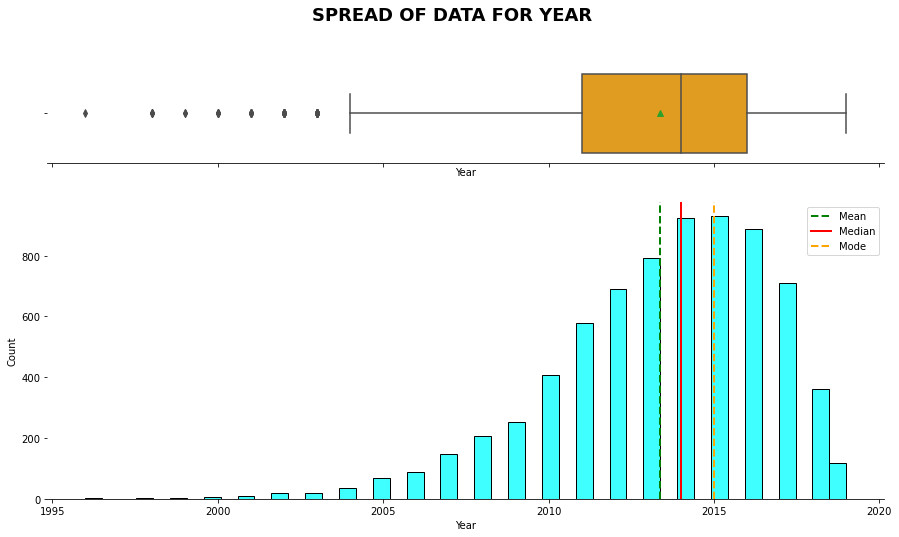

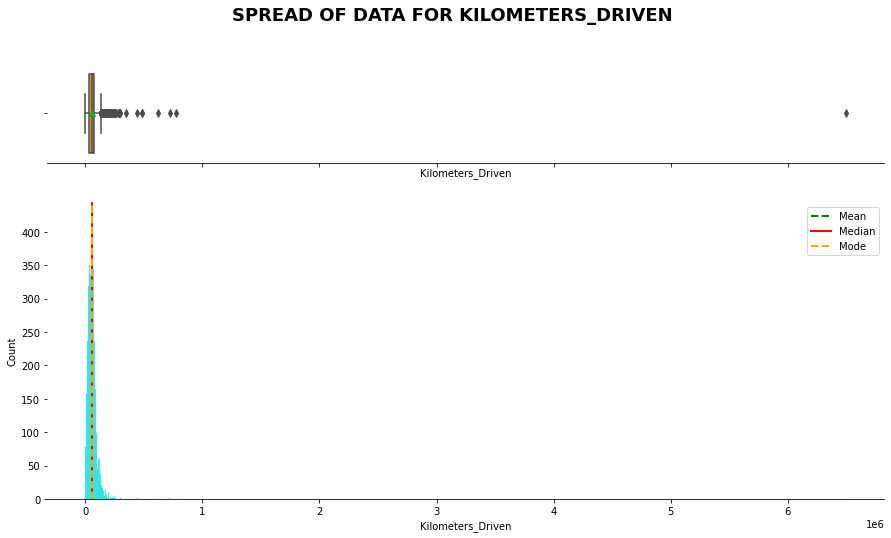

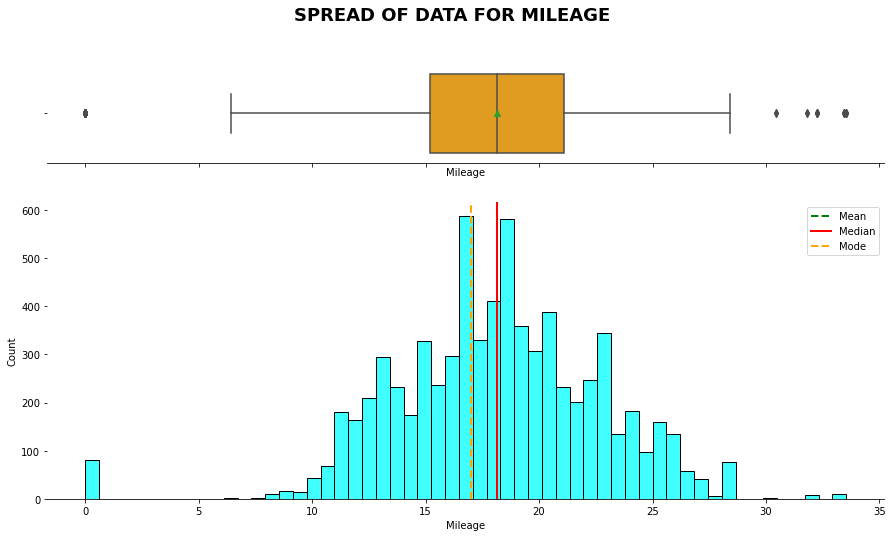

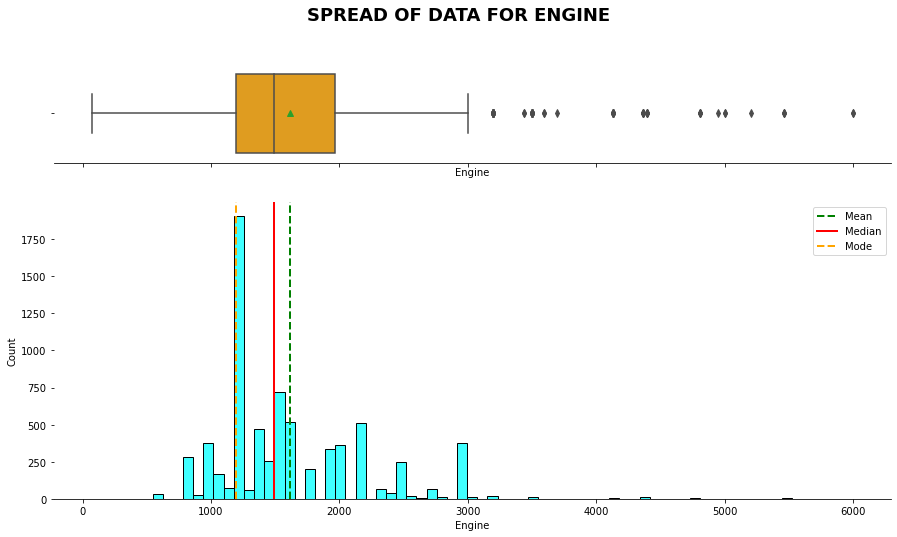

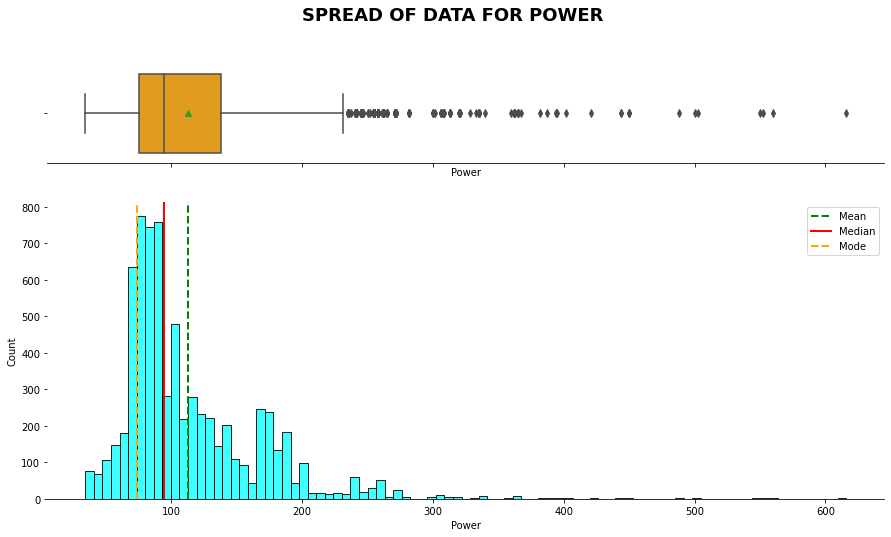

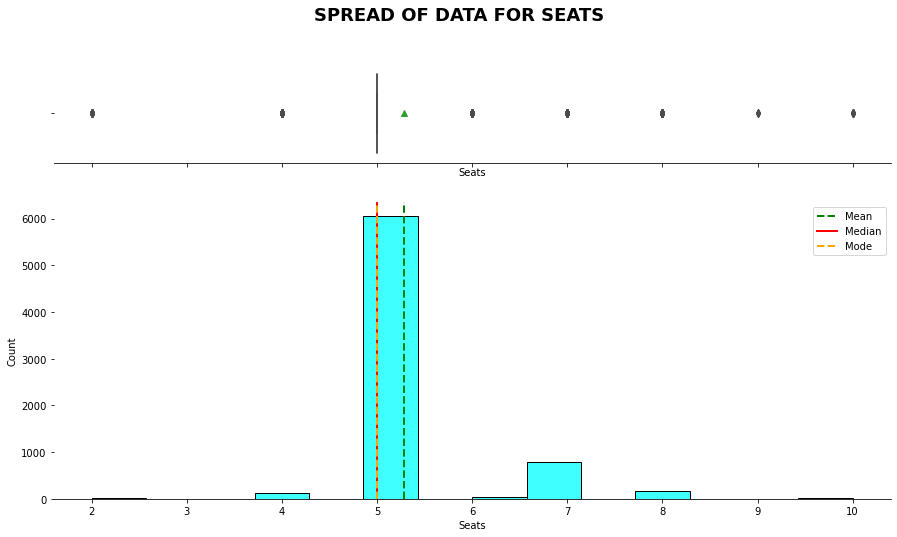

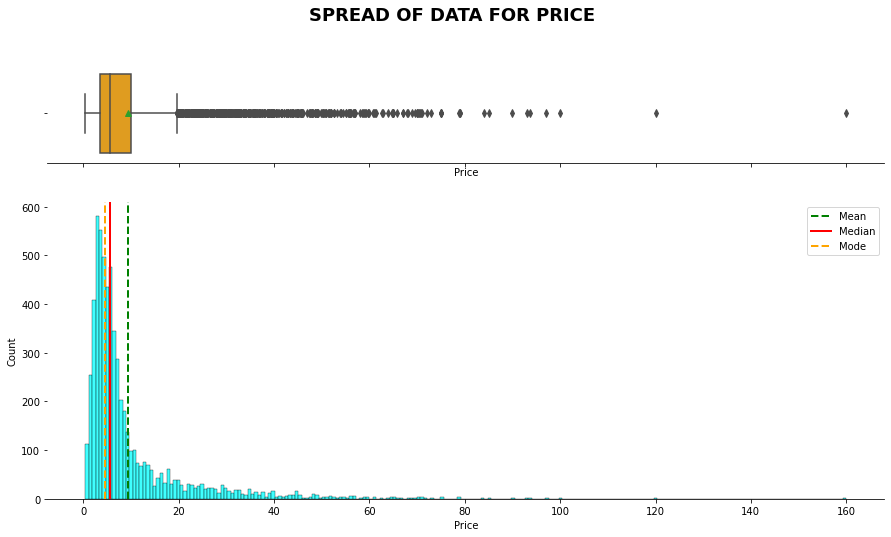

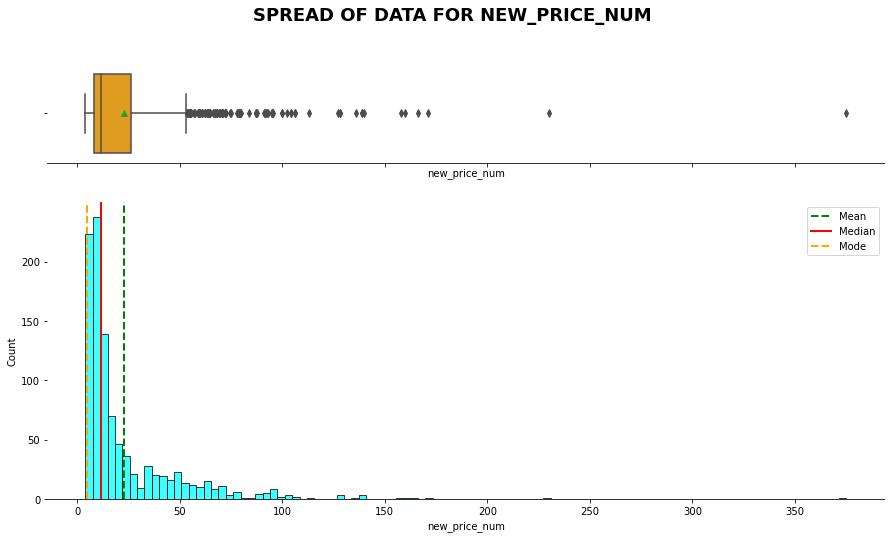

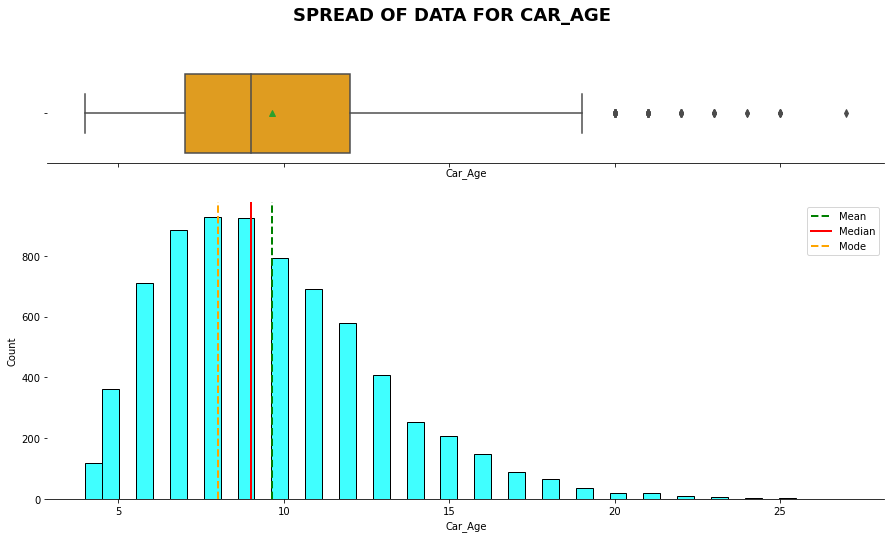

In [55]:
# select all quantitative columns for checking the spread

cols = df1.select_dtypes([np.number]).columns.to_list()

for x in cols:
    hist_box(df1[x])

In [56]:
# Observations -----------------------------------------------------------------

# Year is left skewed and has outilers on lower side., This column can be dropped
# Kilometer_driven is right skewed. Many outliers on upper end.
# Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
# Engine ,power and price are right skewed and has outliers on upper side.
# Age of car is right skewed.

In [57]:
# Listing all categorical features -------------------------

cat_cols = ['Location','Fuel_Type', 'Transmission', 'Seats', 'Owner_Type', 'Brand']

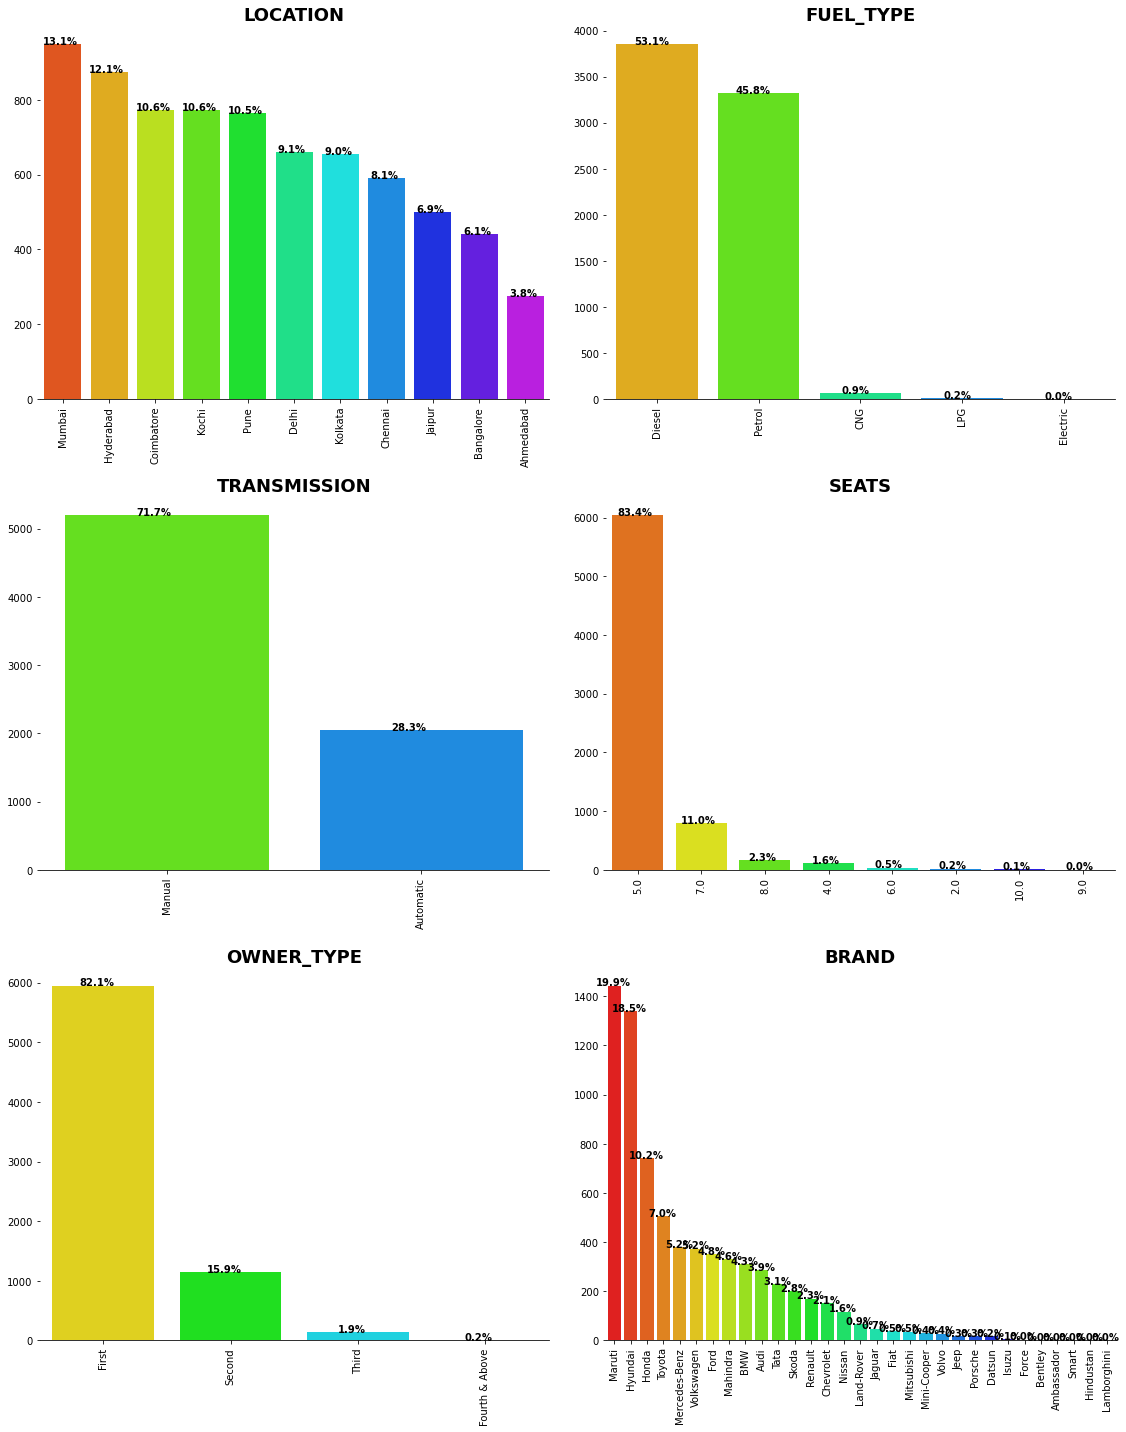

In [58]:
plt.figure(figsize=(16,20))

for i in range(len(cat_cols)):
    plt.subplot(3,2,i+1)
    order = df1[cat_cols[i]].value_counts(ascending=False).index
    ax = sns.countplot(x = df1[cat_cols[i]], data=df1, order=order, palette='gist_rainbow')
    sns.despine(top=True, left=True, right=True)
    bar_perc(ax, df1[cat_cols[i]])
    plt.tight_layout()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.title(cat_cols[i].upper(), fontsize=18, fontweight='bold')

In [59]:
# Observations -------------------------------------------


# ~71 % cars available for sale have manual Transmission.
# ~82 % cars are First owned cars.
# ~39% of car available for sale are from Maruti & Hyundai brands.
# ~53% of car being sold/avialable for purchase have fuel type as Diesel .
# Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
# Most of the cars are 5 seaters.

# Bivariate and Multivariate Analysis

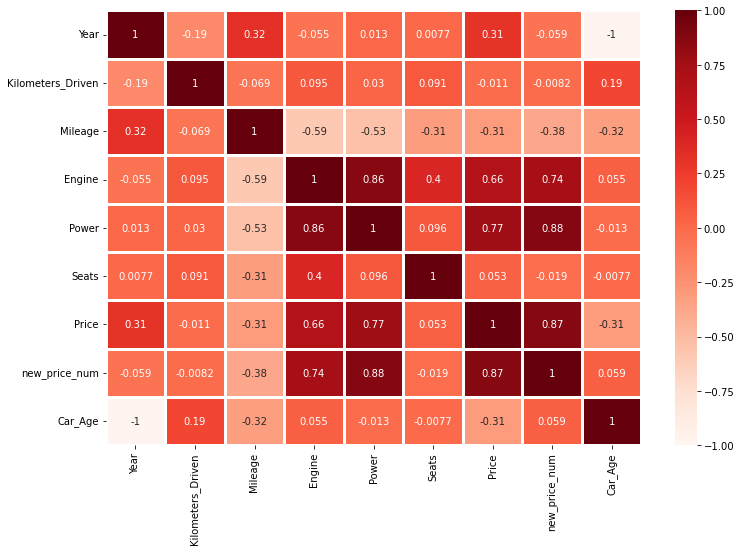

In [60]:
plt.figure(figsize=(12,8))

corr = df1.corr()
sns.heatmap(data=corr, cmap='Reds', annot=True, cbar=True, linewidths=3)
plt.show()

In [61]:
# Observations -------------------------------------------

# Engine has strong positive correlation to Power [0.86].
# Price has positive correlation to Engine[0.66] as well Power [0.77].
# Mileage is negative correlated to Engine,Power,Price & car age.
# Price has negative correlation to age of car.
# Kilometer driven doesnt impact Price.

<Figure size 864x576 with 0 Axes>

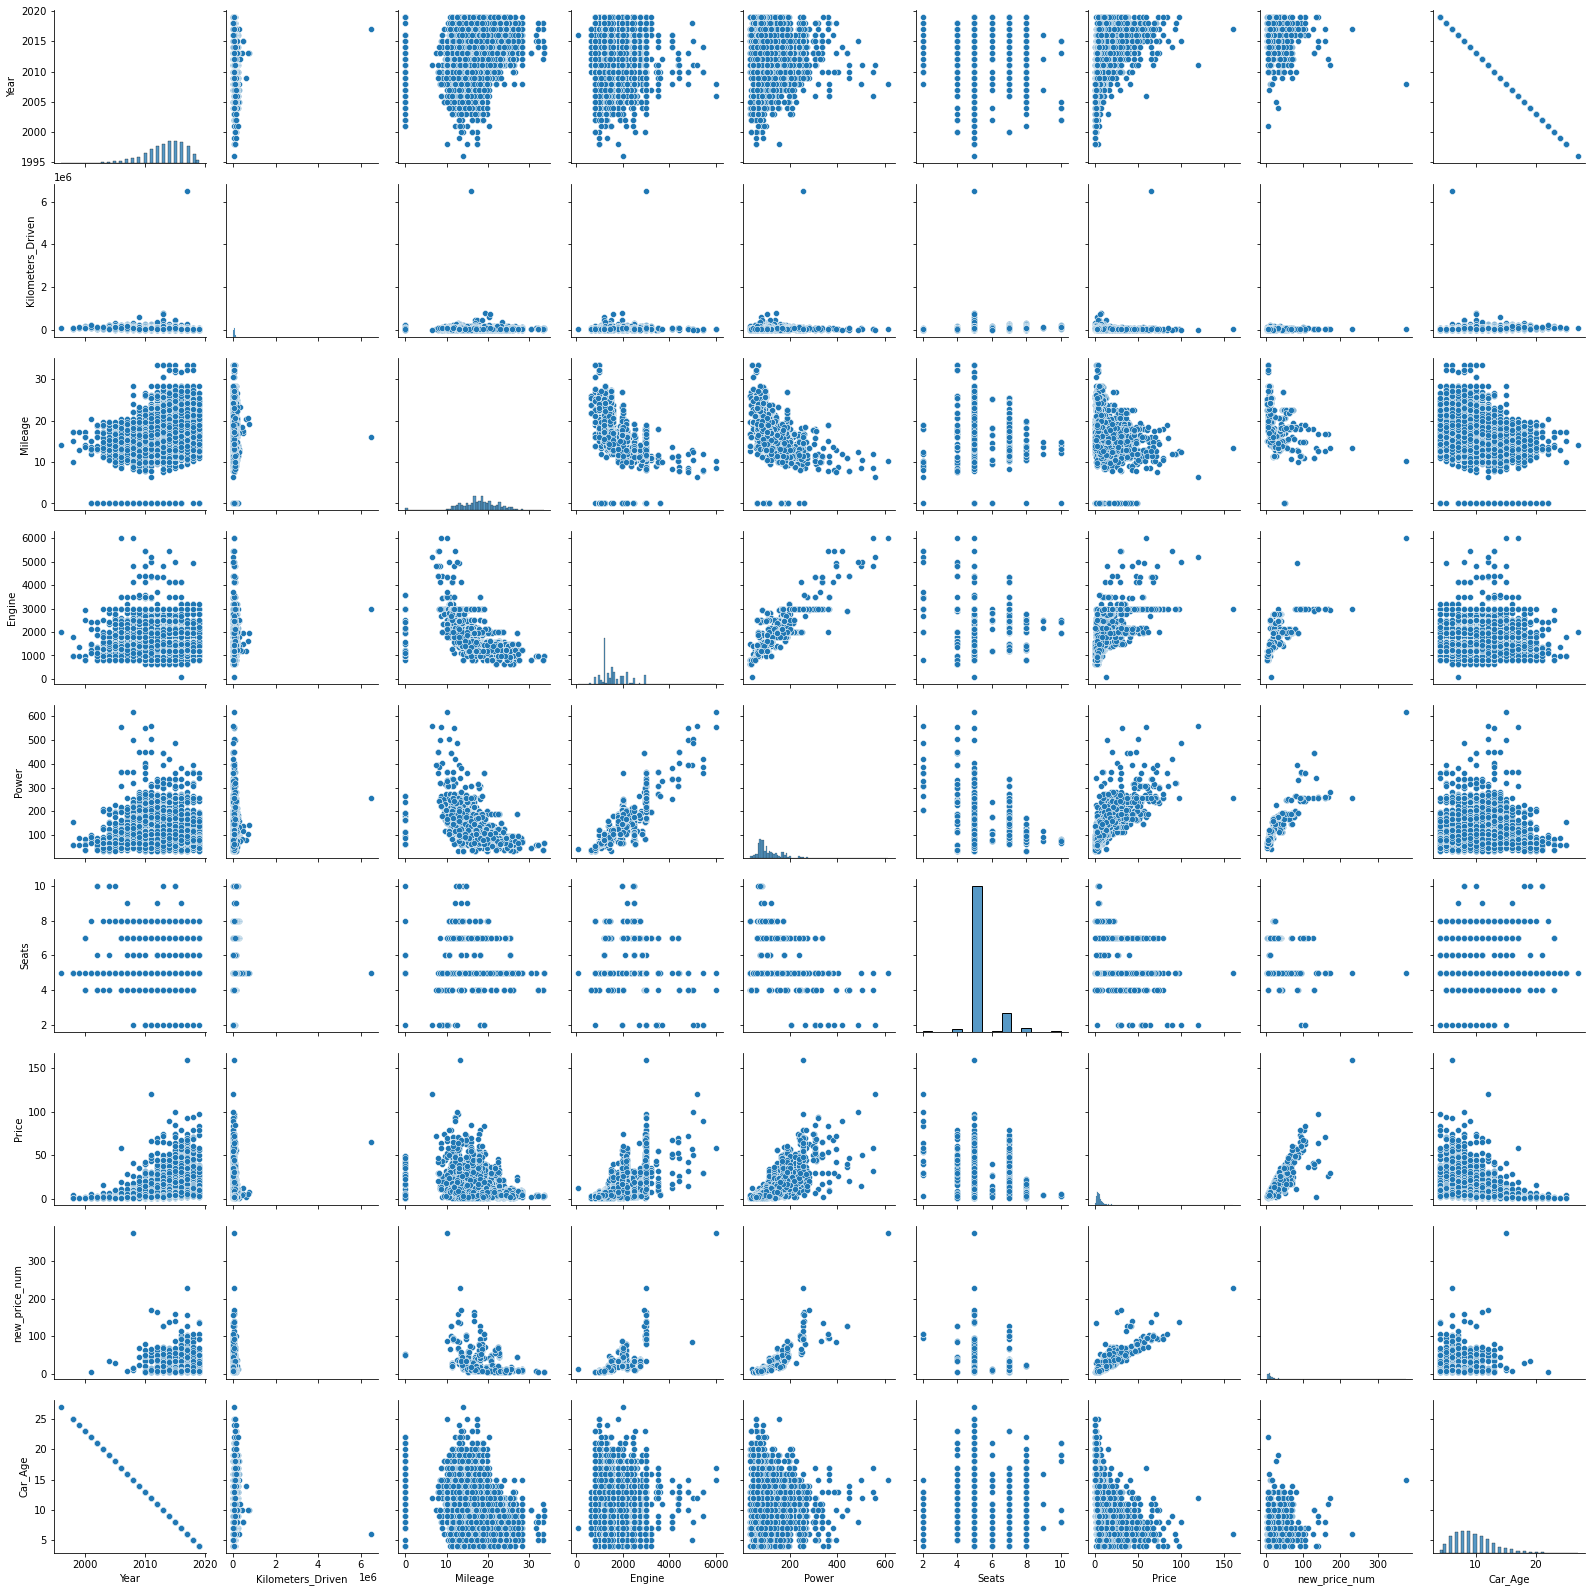

In [62]:
plt.figure(figsize=(12,8))

sns.pairplot(data=df1)
plt.show()

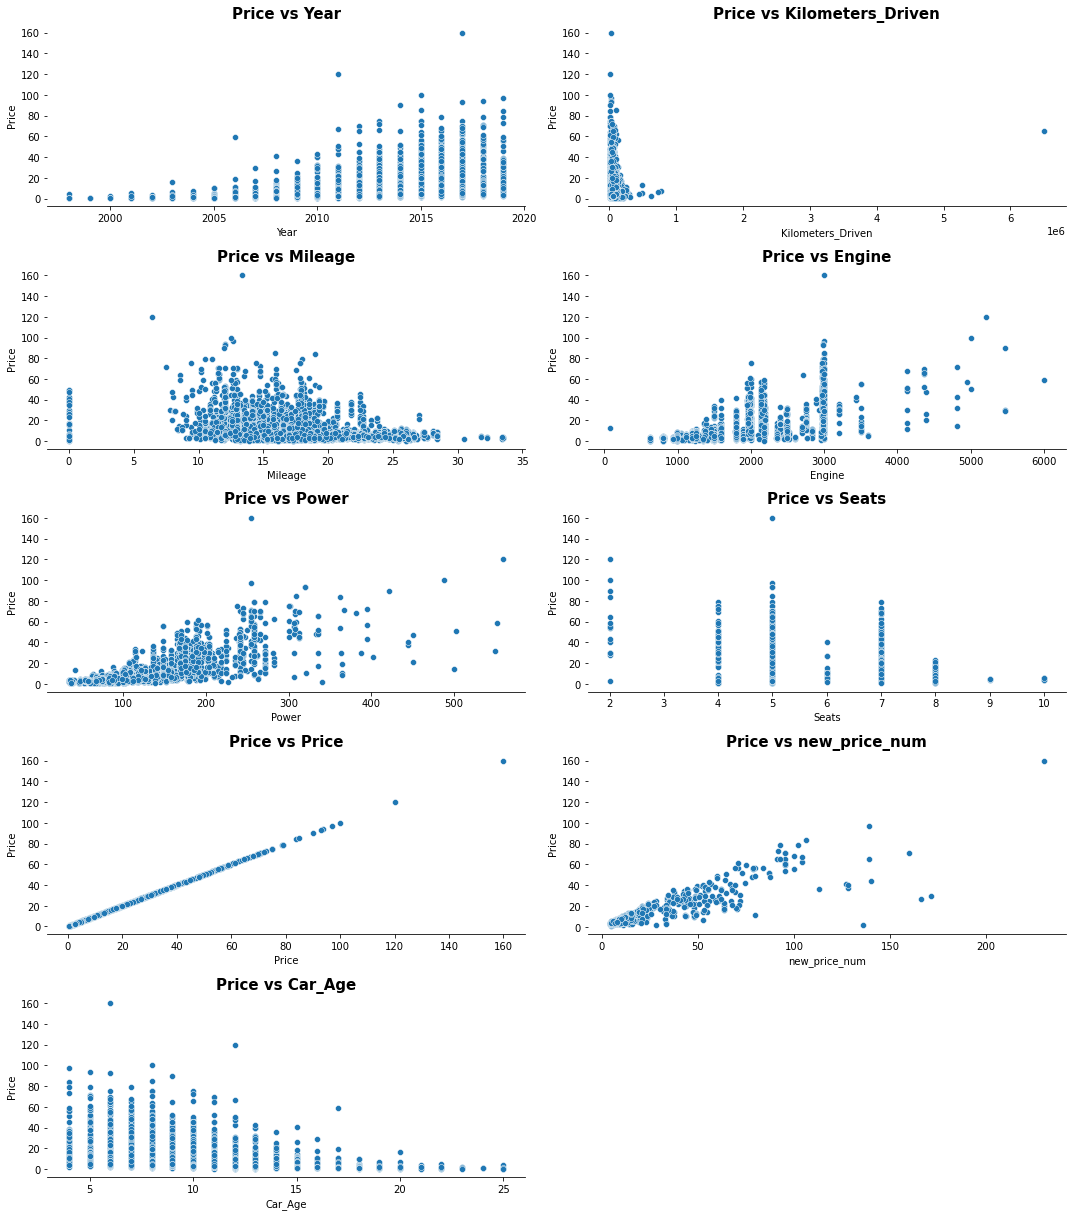

In [63]:
# Price vs numeric features ---------------------------------------

num_cols = df1.select_dtypes([np.number]).columns.to_list()

plt.figure(figsize=(15,17))

for i, item in enumerate(num_cols):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df1[item], y=df1.Price, data=df1)
    plt.title('Price vs '+ item, fontsize=15, fontweight='bold')
    sns.despine(top=True, left=True, right=True)
    plt.tight_layout()

## Handling Missing Values

In [64]:
df1.isnull().sum().sort_values(ascending=False)

new_price_num        6246
Price                1233
Power                 175
Seats                  54
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

In [65]:
# Missing value Treatment for Engine ---------------------------

df1.groupby(['Year', 'Fuel_Type', 'Transmission'], as_index=False)['Engine'].median()

,Year,Fuel_Type,Transmission,Engine
0,1996,CNG,Automatic,NaN
1,1996,CNG,Manual,NaN
2,1996,Diesel,Automatic,NaN
3,1996,Diesel,Manual,1995.0
4,1996,Electric,Automatic,NaN
...,...,...,...,...
225,2019,Electric,Manual,NaN
226,2019,LPG,Automatic,NaN
227,2019,LPG,Manual,NaN
228,2019,Petrol,Automatic,1199.0


In [66]:
df1['Engine'] = df1.groupby(['Year', 'Fuel_Type', 'Transmission'])['Engine'].apply(lambda x : x.fillna(x.median()))

In [67]:
df1[df1.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,16.11,NaN,20,Land-Rover,RoverRange


In [68]:
# Missing value Treatment for Power ---------------------------

df1.groupby(['Year', 'Fuel_Type', 'Transmission'], as_index=False)['Power'].median()

,Year,Fuel_Type,Transmission,Power
0,1996,CNG,Automatic,NaN
1,1996,CNG,Manual,NaN
2,1996,Diesel,Automatic,NaN
3,1996,Diesel,Manual,NaN
4,1996,Electric,Automatic,NaN
...,...,...,...,...
225,2019,Electric,Manual,NaN
226,2019,LPG,Automatic,NaN
227,2019,LPG,Manual,NaN
228,2019,Petrol,Automatic,88.70


In [69]:
df1['Power'] = df1.groupby(['Year', 'Fuel_Type', 'Transmission'])['Power'].apply(lambda x:x.fillna(x.median()))

In [70]:
df1['Power'].isnull().sum()

5

In [71]:
# Missing value Treatment for Mileage ---------------------------

df1.groupby(['Year', 'Fuel_Type', 'Transmission'], as_index=False)['Mileage'].median()

,Year,Fuel_Type,Transmission,Mileage
0,1996,CNG,Automatic,NaN
1,1996,CNG,Manual,NaN
2,1996,Diesel,Automatic,NaN
3,1996,Diesel,Manual,14.1
4,1996,Electric,Automatic,NaN
...,...,...,...,...
225,2019,Electric,Manual,NaN
226,2019,LPG,Automatic,NaN
227,2019,LPG,Manual,NaN
228,2019,Petrol,Automatic,19.0


In [72]:
df1['Mileage'] = df1.groupby(['Year', 'Fuel_Type', 'Transmission'])['Mileage'].apply(lambda x : x.fillna(x.median()))

In [73]:
df1.Mileage.isnull().sum()

2

In [74]:
col=['Engine','Power','Mileage']
df1[col].isnull().sum()

Engine     1
Power      5
Mileage    2
dtype: int64

In [75]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and brand to get  more granularity and more accurate Engine and then fillig with median

df1['Engine']=df1.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [76]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and brand to get more granularity and more accurate Engine

df1['Power']=df1.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [77]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and brand to get more granularity and more accurate Engine

df1['Mileage']=df1.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [78]:
df1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   2
Seats                  54
Price                1233
new_price_num        6246
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

In [79]:
# Missing value Treatment for Seats ---------------------------

df1.groupby(['Brand','Model'])['Seats'].median()

Brand       Model    
Ambassador  1000AC      NaN
            1Series     NaN
            370ZAT      NaN
            3Series     NaN
            5Series     NaN
                         ..
Volvo       i20Magna    NaN
            i20Sportz   NaN
            i20new      NaN
            redi-GOS    NaN
            redi-GOT    NaN
Name: Seats, Length: 22506, dtype: float64

In [80]:
df1['Seats'] = df1.groupby(['Brand','Model'])['Seats'].apply(lambda x : x.fillna(x.median()))

In [81]:
df1.Seats.isnull().sum()

23

In [82]:
df1.groupby(['Brand'])['Seats'].median()

Brand
Ambassador       5.0
Audi             5.0
BMW              5.0
Bentley          4.5
Chevrolet        5.0
Datsun           5.0
Fiat             5.0
Force            7.0
Ford             5.0
Hindustan        5.0
Honda            5.0
Hyundai          5.0
Isuzu            5.0
Jaguar           5.0
Jeep             5.0
Lamborghini      2.0
Land-Rover       5.0
Mahindra         7.0
Maruti           5.0
Mercedes-Benz    5.0
Mini-Cooper      4.0
Mitsubishi       6.0
Nissan           5.0
Porsche          4.0
Renault          5.0
Skoda            5.0
Smart            2.0
Tata             5.0
Toyota           7.0
Volkswagen       5.0
Volvo            5.0
Name: Seats, dtype: float64

In [83]:
df1['Seats'] = df1.groupby(['Brand'])['Seats'].apply(lambda x : x.fillna(x.median()))

In [84]:
df1.Seats.isnull().sum()

0

In [85]:
df1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   2
Seats                   0
Price                1233
new_price_num        6246
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

In [86]:
# Processing New Price -------------------------------------------

# For better granualarity grouping value brings it more near to real value 

df1.groupby(['Year', 'Brand', 'Fuel_Type', 'Transmission'])['new_price_num'].median()

Year  Brand       Fuel_Type  Transmission
1996  Ambassador  CNG        Automatic      NaN
                             Manual         NaN
                  Diesel     Automatic      NaN
                             Manual         NaN
                  Electric   Automatic      NaN
                                             ..
2019  Volvo       Electric   Manual         NaN
                  LPG        Automatic      NaN
                             Manual         NaN
                  Petrol     Automatic      NaN
                             Manual         NaN
Name: new_price_num, Length: 7130, dtype: float64

In [87]:
df1['new_price_num'] = df1.groupby(['Year', 'Brand', 'Fuel_Type', 'Transmission'])['new_price_num'].apply(
    lambda x:x.fillna(x.median()))

In [88]:
df1.new_price_num.isnull().sum()

2350

In [89]:
df1.groupby(['Brand', 'Fuel_Type', 'Transmission'])['new_price_num'].median()

Brand       Fuel_Type  Transmission
Ambassador  CNG        Automatic      NaN
                       Manual         NaN
            Diesel     Automatic      NaN
                       Manual         NaN
            Electric   Automatic      NaN
                                       ..
Volvo       Electric   Manual         NaN
            LPG        Automatic      NaN
                       Manual         NaN
            Petrol     Automatic      NaN
                       Manual         NaN
Name: new_price_num, Length: 310, dtype: float64

In [90]:
df1['new_price_num'] = df1.groupby(['Brand', 'Fuel_Type', 'Transmission'])['new_price_num'].apply(
    lambda x:x.fillna(x.median()))
df1.new_price_num.isnull().sum()

278

In [91]:
df1.groupby(['Brand','Transmission'])['new_price_num'].median()

Brand       Transmission
Ambassador  Automatic           NaN
            Manual              NaN
Audi        Automatic       53.1400
            Manual              NaN
BMW         Automatic       58.5700
                             ...   
Toyota      Manual          20.4800
Volkswagen  Automatic       15.8600
            Manual          11.0925
Volvo       Automatic       45.6700
            Manual              NaN
Name: new_price_num, Length: 62, dtype: float64

In [92]:
df1['new_price_num'] = df1.groupby(['Brand', 'Transmission'])['new_price_num'].apply(
    lambda x:x.fillna(x.median()))
df1.new_price_num.isnull().sum()

191

In [93]:
df1.groupby(['Brand'])['new_price_num'].median()

Brand
Ambassador            NaN
Audi              53.1400
BMW               58.5700
Bentley          375.0000
Chevrolet             NaN
Datsun             4.4000
Fiat               8.6500
Force                 NaN
Ford              11.2675
Hindustan             NaN
Honda              9.3600
Hyundai            8.7650
Isuzu             33.6800
Jaguar            52.9600
Jeep              22.9500
Lamborghini           NaN
Land-Rover       127.0000
Mahindra          11.2800
Maruti             6.4800
Mercedes-Benz     78.7600
Mini-Cooper       42.1200
Mitsubishi        33.0900
Nissan            10.4800
Porsche          136.0000
Renault           15.0100
Skoda             24.1550
Smart                 NaN
Tata               7.9550
Toyota            21.2150
Volkswagen        11.1600
Volvo             45.6700
Name: new_price_num, dtype: float64

In [94]:
df1['new_price_num'] = df1.groupby(['Brand'])['new_price_num'].apply(
    lambda x:x.fillna(x.median()))
df1.new_price_num.isnull().sum()

158

In [95]:
df1.groupby(['Location'])['new_price_num'].median()

Location
Ahmedabad     11.26750
Bangalore     14.01000
Chennai       11.19500
Coimbatore    12.02250
Delhi         11.28000
Hyderabad     11.26750
Jaipur         8.95000
Kochi         11.26875
Kolkata        9.14000
Mumbai        11.28000
Pune          10.17500
Name: new_price_num, dtype: float64

In [96]:
df1['new_price_num'] = df1.groupby(['Location'])['new_price_num'].apply(
    lambda x:x.fillna(x.median()))
df1.new_price_num.isnull().sum()

0

In [97]:
# Processing Price -------------------------------------------

# For better granualarity grouping value brings it more near to real value 

df1['Price'] = df1.groupby(['Year', 'Brand', 'Fuel_Type', 'Transmission'])['Price'].apply(lambda x : x.fillna(x.median()))

In [98]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 2
Seats                 0
Price                35
new_price_num         0
Car_Age               0
Brand                 0
Model                 0
dtype: int64

In [99]:
df1['Price'] = df1.groupby(['Brand', 'Fuel_Type', 'Transmission'])['Price'].apply(lambda x : x.fillna(x.median()))
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                2
Seats                0
Price                5
new_price_num        0
Car_Age              0
Brand                0
Model                0
dtype: int64

In [100]:
df1['Price'] = df1.groupby(['Brand', 'Fuel_Type'])['Price'].apply(lambda x : x.fillna(x.median()))
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                2
Seats                0
Price                1
new_price_num        0
Car_Age              0
Brand                0
Model                0
dtype: int64

In [101]:
cols = ['Mileage', 'Power']

for item in cols:
    df1[item] = df1[item].fillna(df1[item].median())

In [102]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                1
new_price_num        0
Car_Age              0
Brand                0
Model                0
dtype: int64

In [103]:
df1['Price'] = df1['Price'].fillna(df1['Price'].median())
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Car_Age              0
Brand                0
Model                0
dtype: int64

In [104]:
# Finally, all the NaN values have been treated---------------------

In [105]:
df1.groupby(['Brand'])['Price'].agg({'mean', 'median', 'max'})

,max,mean,median
Brand,,,
Ambassador,1.35,1.350000,1.350
Audi,72.94,25.009965,23.750
BMW,93.67,24.884503,21.415
Bentley,59.00,59.000000,59.000
Chevrolet,9.87,3.018212,2.500
Datsun,3.95,3.065000,3.100
Fiat,7.71,3.265395,2.550
Force,12.00,9.333333,8.000
Ford,56.80,6.721040,5.380


In [106]:
# using business knowledge to create class----------------

Low = ['Maruti', 'Hyundai','Ambassador','Hindustan','Force','Chevrolet',
     'Fiat','Tata','Smart','Renault','Datsun','Mahindra','Skoda','Ford','Toyota',
     'Isuzu','Mitsubishi','Honda']

High=['Audi','Mini-Cooper','Bentley','Mercedes-Benz','Lamborghini',
      'Volkswagen','Porsche','Land-Rover','Nissan','Volvo','Jeep',
      'Jaguar','BMW'] # more than 30lakh.

In [107]:
def classrange(x):
    if x in Low:
        return('Low')
    elif x in High:
        return('High')
    else:
        return x

In [108]:
df1['Brand_Class'] = df1['Brand'].apply(lambda x : classrange(x))
df1['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

In [109]:
df1['Brand_Class'] = df1['Brand_Class'].astype('category')
df1['Seats'] = df1['Seats'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   category
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7252 non-null   float64 
 8   Engine             7252 non-null   float64 
 9   Power              7252 non-null   float64 
 10  Seats              7252 non-null   int32   
 11  Price              7252 non-null   float64 
 12  new_price_num      7252 non-null   float64 
 13  Car_Age            7252 non-null   int64   
 14  Brand              7252 non-null   category
 15  Model              7252 non-null   category
 16  Brand_

### Variables that are correlated with Price variable

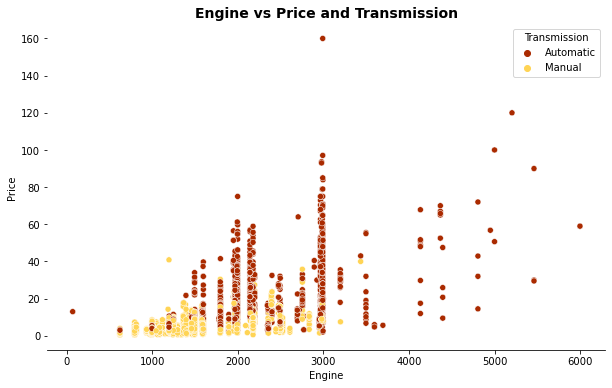

In [110]:
# understand relation ship of Engine vs Price and Transmimssion

plt.figure(figsize=(10,6))

sns.scatterplot(x=df1.Engine, y=df1.Price, hue=df1.Transmission, palette='afmhot')
sns.despine(top=True, right=True, left=True)
plt.title('Engine vs Price and Transmission', fontsize=14, fontweight='bold')
plt.show()

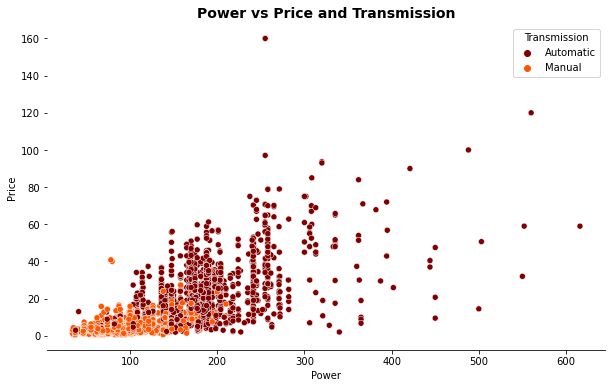

In [111]:
# understand relation ship of Power vs Price and Transmimssion

plt.figure(figsize=(10,6))

sns.scatterplot(x=df1.Power, y=df1.Price, hue=df1.Transmission, palette='gist_heat')
sns.despine(top=True, right=True, left=True)
plt.title('Power vs Price and Transmission', fontsize=14, fontweight='bold')
plt.show()

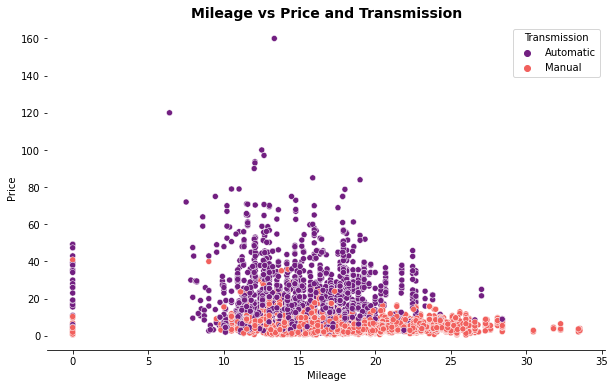

In [112]:
# understand relation ship of Mileage vs Price and Transmimssion

plt.figure(figsize=(10,6))

sns.scatterplot(x=df1.Mileage, y=df1.Price, hue=df1.Transmission, palette='magma')
sns.despine(top=True, right=True, left=True)
plt.title('Mileage vs Price and Transmission', fontsize=14, fontweight='bold')
plt.show()

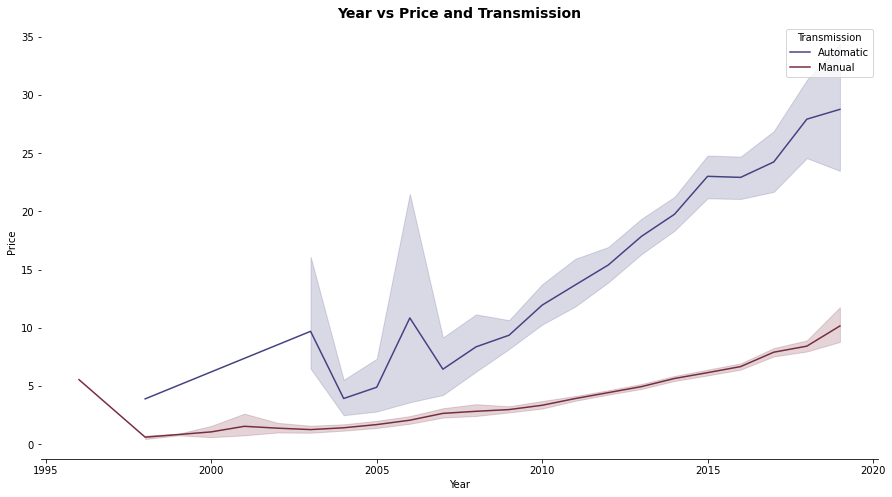

In [113]:
# Impact of years on price 

plt.figure(figsize=(15,8))

sns.lineplot(x=df1.Year, y=df1.Price, hue=df1.Transmission, palette='icefire')
sns.despine(top=True, right=True, left=True)
plt.title('Year vs Price and Transmission', fontsize=14, fontweight='bold')
plt.show()

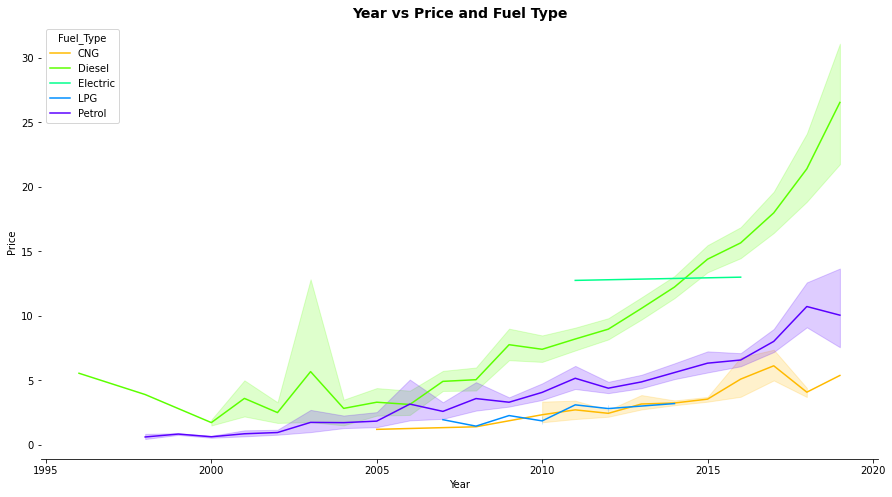

In [114]:
plt.figure(figsize=(15,8))

sns.lineplot(x=df1.Year, y=df1.Price, hue=df1.Fuel_Type, palette='gist_rainbow')
sns.despine(top=True, right=True, left=True)
plt.title('Year vs Price and Fuel Type', fontsize=14, fontweight='bold')
plt.show()

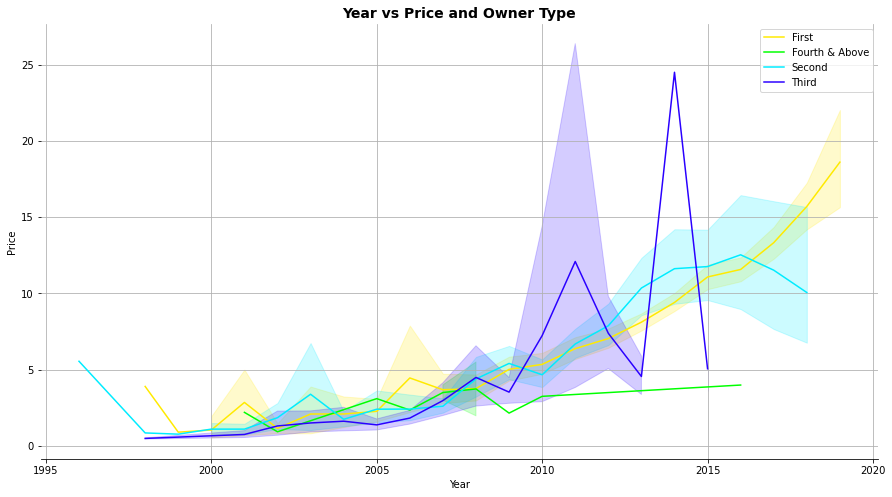

In [115]:
plt.figure(figsize=(15,8))

sns.lineplot(x=df1.Year, y=df1.Price, hue=df1.Owner_Type, palette='gist_rainbow')
sns.despine(top=True, right=True, left=True)
plt.title('Year vs Price and Owner Type', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [116]:
# Need to check the reason for spike in price for third owner and model in 2010 and 2015.

In [117]:
df1[(df1["Owner_Type"]=='Third') & (df1["Year"].isin([2010, 2011, 2012]))].sort_values(by='Price',ascending =False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model,Brand_Class
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.00,2,120.00,11.28,12,Lamborghini,GallardoCoupe,High
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00,4806.0,394.30,4,42.91,136.00,13,Porsche,Panamera2010,High
2288,Audi A6 3.0 TDI quattro,Bangalore,2011,50000,Diesel,Automatic,Third,16.77,2967.0,241.38,5,21.00,67.10,12,Audi,A63.0,High
3955,Toyota Fortuner 3.0 Diesel,Bangalore,2012,100000,Diesel,Manual,Third,11.50,2982.0,171.00,7,16.00,19.27,11,Toyota,Fortuner3.0,Low
3030,BMW 3 Series 320d Sport,Mumbai,2012,37000,Diesel,Automatic,Third,22.69,1995.0,190.00,5,15.00,67.07,11,BMW,3Series,High
4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48,2143.0,177.00,5,13.85,67.07,11,BMW,5Series,High
5404,BMW 5 Series 2003-2012 520d,Pune,2010,170000,Diesel,Automatic,Third,18.48,1995.0,177.00,5,12.00,48.79,13,BMW,5Series,High
4650,BMW X1 sDrive20d,Chennai,2012,85000,Diesel,Automatic,Third,17.05,1995.0,184.00,5,10.00,67.07,11,BMW,X1sDrive20d,High
5348,BMW X1 sDrive 20d Exclusive,Chennai,2012,115000,Diesel,Automatic,Third,15.06,1995.0,177.00,5,10.00,67.07,11,BMW,X1sDrive,High
6401,Toyota Innova 2.5 GX 8 STR,Delhi,2011,53138,Diesel,Manual,Third,12.80,2494.0,102.00,8,9.00,36.69,12,Toyota,Innova2.5,Low


In [118]:
# We can see during year 2010-2012, top 10 cars with 3rd owner type belonged to 'Lamborghini', 'Porsche', 'Audi', 
# 'BMW' & 'Toyota'. Hence, the sudden spike in car price during this period.

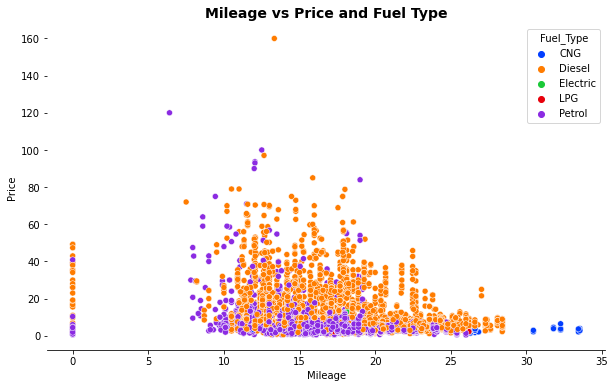

In [119]:
# Price Vs Mileage vs Fuel_type

plt.figure(figsize=(10,6))

sns.scatterplot(x=df1.Mileage, y=df1.Price, hue=df1.Fuel_Type, palette='bright')
sns.despine(top=True, right=True, left=True)
plt.title('Mileage vs Price and Fuel Type', fontsize=14, fontweight='bold')
plt.show()

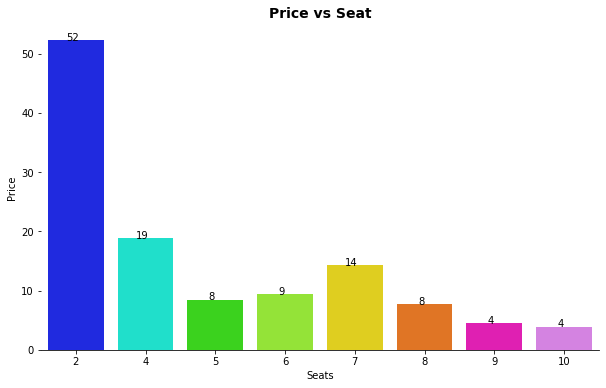

In [120]:
# Price Vs Seat

plt.figure(figsize=(10,6))

ax = sns.barplot(x=df1.Seats, y=df1.Price, palette='gist_ncar', ci=0)
bar_num(ax, df1.Seats)
sns.despine(top=True, right=True, left=True)
plt.title('Price vs Seat', fontsize=14, fontweight='bold')
plt.show()

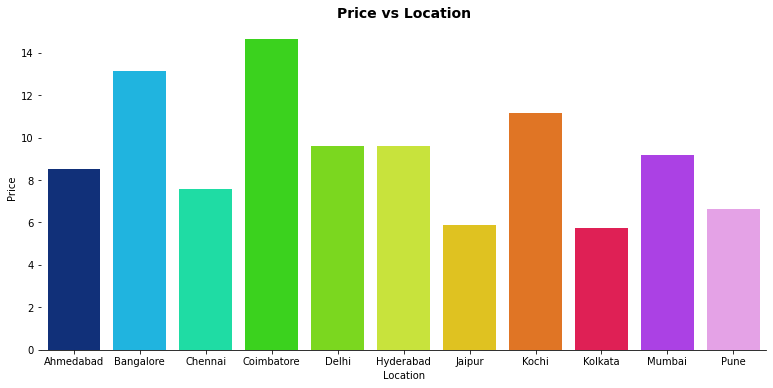

In [121]:
# Price Vs Location

plt.figure(figsize=(13,6))

ax = sns.barplot(x=df1.Location, y=df1.Price, palette='gist_ncar', ci=0)
sns.despine(top=True, right=True, left=True)
plt.title('Price vs Location', fontsize=14, fontweight='bold')
plt.show()

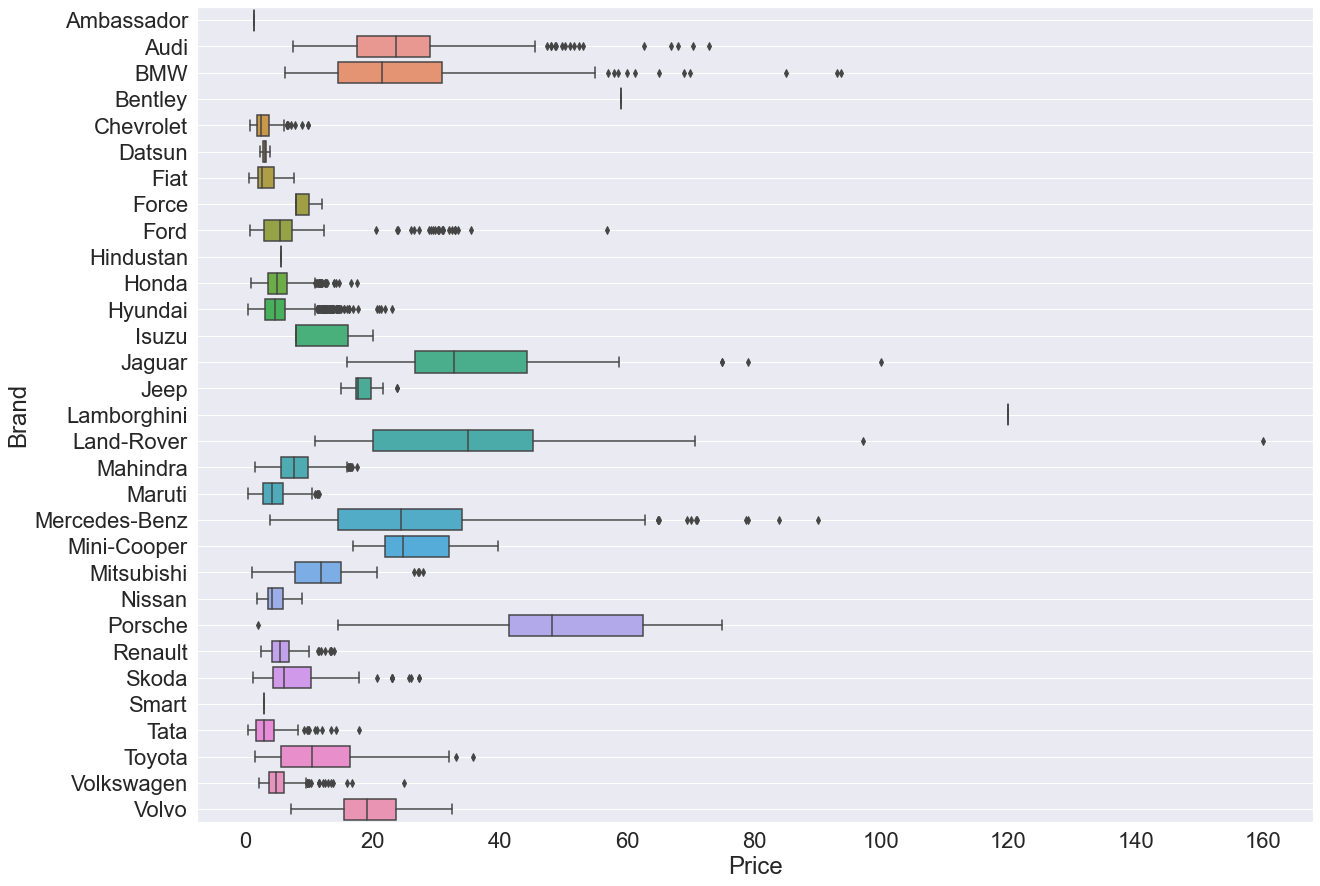

In [122]:
# Price Vs Brand

plt.figure(figsize=(20,15))
sns.set(font_scale=2)                            # to increase font size.
sns.boxplot(x='Price', y='Brand', data=df1)
plt.grid()
plt.show()

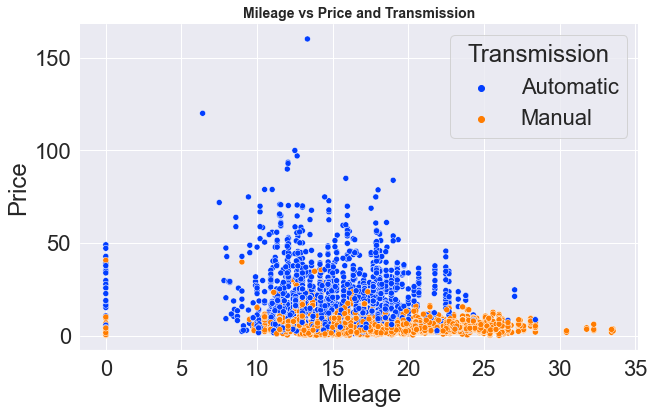

In [123]:
# Price Vs Mileage vs Transmission

plt.figure(figsize=(10,6))

sns.scatterplot(x=df1.Mileage, y=df1.Price, hue=df1.Transmission, palette='bright')
sns.despine(top=True, right=True, left=True)
plt.title('Mileage vs Price and Transmission', fontsize=14, fontweight='bold')
plt.show()

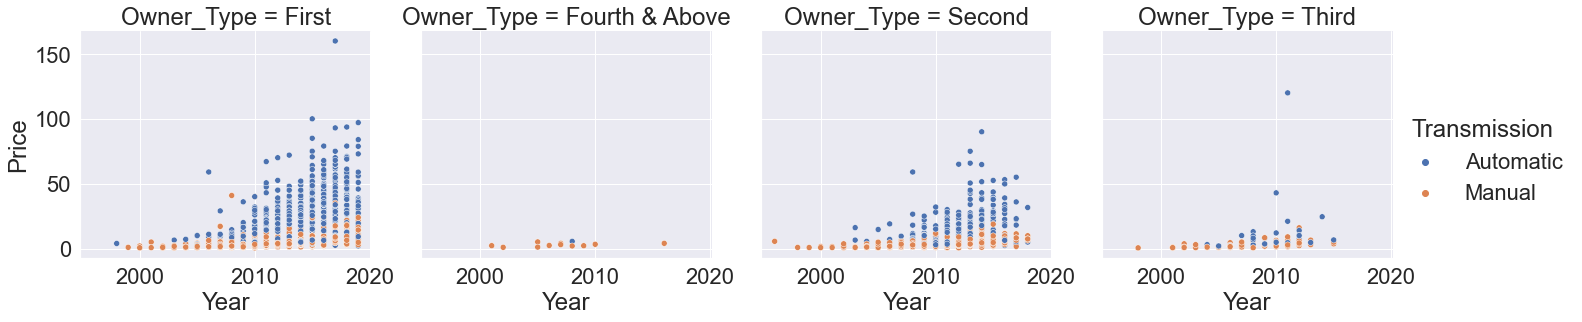

In [124]:
sns.relplot(x=df1.Year, y=df1.Price, hue=df1.Transmission, col=df1.Owner_Type)
plt.show()

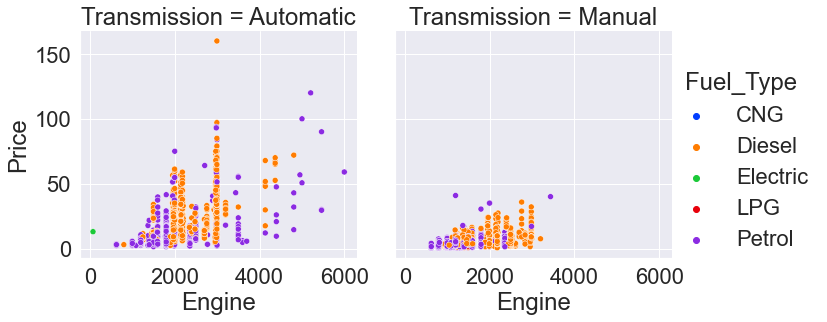

In [125]:
sns.relplot(x=df1.Engine, y=df1.Price, col=df1.Transmission, hue=df1.Fuel_Type, palette='bright')
plt.show()

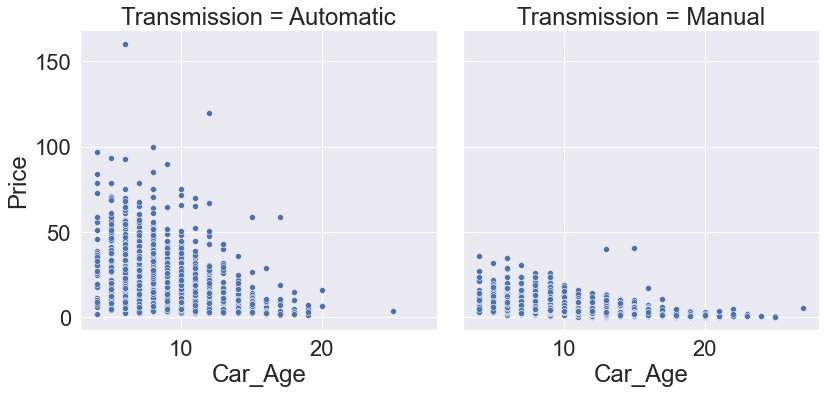

In [126]:
sns.relplot(x=df1.Car_Age, y=df1.Price, col=df1.Transmission, aspect=1,height=6)
plt.show()

## Insights based on EDA

In [127]:
# Observations ----------------------------------------------------

# Expensive cars are in Coimbatore and Banglore.
# 2 Seater cars are more expensive.
# Deisel Fuel type car are more expensive compared to other fuel type.
# As expected, Older model are sold cheaper compared to latest model
# Automatic transmission vehicle have a higher price than manual transmission vehicles.
# Vehicles with more engine capacity (CC) have higher prices.
# Price decreases as number of owner increases.
# Automatic transmission cars seems to belong to category of high engine CC and power. Maybe they are luxury / sports cars like 
# Lamborghini, Audi, BMW, Mercedes, Porsche etc.
# Prices for Cars with fuel type as Deisel has increased with recent models
# Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

In [143]:
# Search top brand Cars by different features -------------------------

brand = str(input('Enter the Brand of Car to be searched :- '))
location = str(input('Enter the Location to be searched :- '))
fueltype = str(input('Enter the Fuel Type of Car to be searched :- '))
transmission = str(input('Enter the type of Transmission of Car to be searched :- '))
owner = str(input('Enter the Owner type of Car to be searched :- '))

df1[(df1['Brand']==brand) &  (df1['Location']==location) & 
    (df1['Fuel_Type']==fueltype) & (df1['Transmission']==transmission) & 
    (df1['Owner_Type']==owner)].sort_values(by='Price', ascending=True)

Enter the Brand of Car to be searched :- BMW
Enter the Location to be searched :- Delhi
Enter the Fuel Type of Car to be searched :- Diesel
Enter the type of Transmission of Car to be searched :- Automatic
Enter the Owner type of Car to be searched :- First


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Car_Age,Brand,Model,Brand_Class
3059,BMW 3 Series 320d Luxury Line,Delhi,2019,87000,Diesel,Automatic,First,22.69,1995.0,190.00,5,6.670,52.460,4,BMW,3Series,High
3996,BMW 3 Series 320d Corporate Edition,Delhi,2012,76000,Diesel,Automatic,First,16.07,1995.0,181.00,4,8.750,67.070,11,BMW,3Series,High
2925,BMW 3 Series 320d Highline,Delhi,2011,64000,Diesel,Automatic,First,16.07,1995.0,181.00,5,10.500,47.200,12,BMW,3Series,High
5301,BMW X1 sDrive20d,Delhi,2011,72000,Diesel,Automatic,First,17.05,1995.0,184.00,5,11.000,47.200,12,BMW,X1sDrive20d,High
3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48,2143.0,177.00,5,14.500,67.070,11,BMW,5Series,High
7204,BMW 5 Series 2003-2012 520d,Delhi,2011,58067,Diesel,Automatic,First,18.48,1995.0,177.00,5,14.725,47.200,12,BMW,5Series,High
7241,BMW 5 Series 525d Sedan,Delhi,2012,80000,Diesel,Automatic,First,16.73,2993.0,218.00,5,15.000,67.070,11,BMW,5Series,High
1005,BMW 5 Series 2003-2012 520d,Delhi,2013,76000,Diesel,Automatic,First,18.48,1995.0,177.00,5,19.000,58.085,10,BMW,5Series,High
3500,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48,1995.0,190.00,5,21.260,67.870,10,BMW,5Series,High
3632,BMW X6 xDrive30d,Delhi,2011,59000,Diesel,Automatic,First,11.20,2993.0,241.00,4,21.900,47.200,12,BMW,X6xDrive30d,High
